In [1]:
'''
ryTest010_classifier_004_002_OpenAI_spaCy.py
'''
# what does this program do?

'\nryTest010_classifier_004_002_OpenAI_spaCy.py\n'

In [2]:
import pandas as pd
import pickle
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

from pathlib import Path

#thisFile= Path(__file__).name
#thisFile   #'ryTest010_classifier_004_002_OpenAI_spaCy.py'

In [3]:
# get the data from pickle file
#df_spacy=  pd.read_pickle('_pickle_/df_top25Banks_spaCy300.pickle')
#df_openai= pd.read_pickle('_pickle_/df_top25Banks_openAI1536.pickle')

df_text_vector= pd.read_pickle('_pickle_/df_top25Banks_text_vector.pickle')

In [4]:
df_spacy= df_text_vector[['docID', 'bankID', 'vector_spacy']]
df_openai= df_text_vector[['docID', 'bankID', 'vector_openai']]
# rename the column name
df_spacy.rename(columns={'vector_spacy':'vector'}, inplace=True)
df_openai.rename(columns={'vector_openai':'vector'}, inplace=True)

C:\Users\renyu\AppData\Roaming\Python\Python311\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [5]:
df_spacy['vector'].iloc[0].shape

(300,)

In [6]:
df_openai['vector'].iloc[0].shape

(1536,)

In [7]:
#df_text_vector['vector_openai'].iloc[0].__class__
#df_text_vector['vector_spacy'].iloc[0].__class__

In [8]:
#for df in [df_openai, df_spacy]:
#df= df_openai
#df= df_spacy

In [9]:
from sklearn.neighbors      import KNeighborsClassifier
from sklearn.svm            import SVC
from sklearn.linear_model   import LogisticRegression
from sklearn.ensemble       import RandomForestClassifier
from xgboost                import XGBClassifier
from sklearn.metrics import classification_report

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.manifold import TSNE
#from sklearn.manifold import PCA

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# using scikit learn, where can I import PCA from?
from sklearn.decomposition import PCA

In [10]:
# define all functions here
#
def plotX_nd_in_2D(X_nd, y, theTitle= 'X_nd--tSNE_2D', 
                   降維方法= 'tSNE', sampleInterval= 10):
    '''
    X_nd:      the n dimensional data
    y:          the labels
    theTitle:   the title of the plot
    '''
    # for X_test_nd, after MLPClassifier, 
    # dimensionality reduction from n to 2, and plot it
    if 降維方法== 'PCA':
        X_embedded= PCA(n_components=2).fit_transform(X_nd)
    elif 降維方法== 'tSNE':
        X_embedded= TSNE(n_components=2).fit_transform(X_nd)
    else: ## 預設用 'tSNE'
        X_embedded= TSNE(n_components=2).fit_transform(X_nd)
    
    X_embedded.shape # (2110, 2)
    
    sns.scatterplot(
        x= X_embedded[0::sampleInterval,0],
        y= X_embedded[0::sampleInterval,1],
        hue= y[0::sampleInterval],
        legend='full',
        palette= 'rainbow', #'bright',
        )
    plt.title(theTitle)
    # save the plot
    plt.savefig(f'{theTitle}.png')
    
    plt.show()


def plotX_nd_in_2D_plotly(X_nd, y, theTitle= 'X_nd--tSNE_2D', 
                          降維方法= 'tSNE', sampleInterval= 10):
    '''
    X_nd:      the n dimensional data
    y:          the labels
    theTitle:   the title of the plot
    '''
    # for X_test_nd, after MLPClassifier, 
    # dimensionality reduction from n to 2, and plot it
    if 降維方法== 'PCA':
        X_embedded= PCA(n_components=2).fit_transform(X_nd)
    elif 降維方法== 'tSNE':
        X_embedded= TSNE(n_components=2).fit_transform(X_nd)
    else: ## 預設用 'tSNE'
        X_embedded= TSNE(n_components=2).fit_transform(X_nd)
    
    X_embedded.shape # (2110, 2)
    
    #sampleInterval= 1
    
    df= pd.DataFrame(
        X_embedded[0::sampleInterval], 
        columns=['x','y'])
        
    df['bankID']= y[0::sampleInterval]
    
    title= theTitle
    fig= px.scatter(df, x='x', y='y',
                        color='bankID',
                        text= 'bankID',
                        opacity=.5,
                        width= 1000,
                        height= 800,
                        title= title,
                        color_continuous_scale=px.colors.sequential.Rainbow
                        )
    
    fig.update_traces(marker=dict(size=10))
    #fig.title('t-SNE 3D visualization: X_pca300 --> X_embedded_3D')
    # save the plot
    fig.write_html(f'{theTitle}.html')
    fig.write_image(f'{theTitle}.png')
    fig.show()

def plotConfusionMatrixAsGraph_bkup(
    cm_test_normalized, 
    clf_classes, 
    theEdgeThreshold= 0.1,
    theTitle= 'Confusion Matrix as Graph with Colored Edges',
    random_seed= 42
    ):
    '''
    cm_test_normalized: the normalized confusion matrix
    clf_classes:        the class labels
    theEdgeThreshold:   the threshold to determine whether to draw an edge
    theTitle:           the title of the plot
    '''
    # create a directed graph
    G = nx.DiGraph()

    numNodes= len(clf_classes) # 22

    # add nodes
    for i in range(numNodes):
        G.add_node(i, label=clf_classes[i])

    # add edges with weights
    for i in range(numNodes):
        for j in range(numNodes):
            if cm_test_normalized[i, j] > theEdgeThreshold: #0.25:
                # Edge weight is directly taken from the confusion matrix
                G.add_edge(i, j, weight=cm_test_normalized[i, j])

    # position using spring layout
    # Fix the seed for reproducibility
    np.random.seed(random_seed)
    pos = nx.spring_layout(G)

    # draw nodes
    #nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'))

    # draw nodes with yellow color
    nx.draw_networkx_nodes(G, pos, node_color='yellow', node_size=100)

    # draw labels
    nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label'))


    # get weights and normalize them
    weights = [G[u][v]['weight'] for u, v in G.edges()]
    max_weight = max(weights)
    min_weight = min(weights)
    norm = mcolors.Normalize(vmin=min_weight, vmax=max_weight)

    # draw edges with color proportional to weight
    for u, v, weight in G.edges(data='weight'):
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=2,
                            edge_color=plt.cm.rainbow(norm(weight)))

    # add colorbar
    sm = plt.cm.ScalarMappable(cmap=plt.cm.rainbow, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, label='Edge Weight')

    # title
    plt.title(f'{theTitle}, {theEdgeThreshold= :.2f}')

    # save and show the plot
    plt.savefig(f'{theTitle}_{theEdgeThreshold= :.2f}.png')
    plt.show()

def plotConfusionMatrixAsGraph(
    cm_test_normalized, 
    clf_classes, 
    theEdgeThreshold= 0.1,
    theTitle= 'Confusion Matrix as Graph with Colored Edges',
    random_seed= 42
    ):
    '''
    cm_test_normalized: the normalized confusion matrix
    clf_classes:        the class labels
    theEdgeThreshold:   the threshold to determine whether to draw an edge
    theTitle:           the title of the plot
    '''
    # create a directed graph
    G = nx.DiGraph()

    numNodes= len(clf_classes) # 22

    # add nodes
    for i in range(numNodes):
        G.add_node(i, label=clf_classes[i])

    # add edges with weights
    for i in range(numNodes):
        for j in range(numNodes):
            if cm_test_normalized[i, j] > theEdgeThreshold: #0.25:
                # Edge weight is directly taken from the confusion matrix
                G.add_edge(i, j, weight=cm_test_normalized[i, j])

    # position using spring layout
    # Fix the seed for reproducibility
    np.random.seed(random_seed)
    pos = nx.spring_layout(G)

    # draw nodes
    #nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'))

    # create a figure and axes
    fig, ax = plt.subplots()


    # draw nodes with yellow color
    #nx.draw_networkx_nodes(G, pos, node_color='yellow', node_size=100, ax)

    # draw labels
    #nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label'))

    # Use the created axes for drawing
    nx.draw_networkx_nodes(G, pos, node_color='yellow', node_size=100, ax=ax)
    nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label'), ax=ax)



    # get weights and normalize them
    weights = [G[u][v]['weight'] for u, v in G.edges()]
    max_weight = max(weights)
    min_weight = min(weights)
    norm = mcolors.Normalize(vmin=min_weight, vmax=max_weight)

    # draw edges with color proportional to weight
    #for u, v, weight in G.edges(data='weight'):
    #    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=2,
    #                        edge_color=plt.cm.rainbow(norm(weight)))
    
    # draw edges with color proportional to weight
    for u, v, weight in G.edges(data='weight'):
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=2,
                           edge_color=plt.cm.rainbow(norm(weight)), ax=ax)


    # add colorbar
    sm = plt.cm.ScalarMappable(cmap=plt.cm.rainbow, norm=norm) #, ax=ax)
    sm.set_array([])
    plt.colorbar(sm, label='Edge Weight', ax=ax)

    # title
    plt.title(f'{theTitle}, {theEdgeThreshold= :.2f}')

    # save and show the plot
    plt.savefig(f'{theTitle}_{theEdgeThreshold= :.2f}.png')
    plt.show()

def plotConfusionMatrix(cm_normalized, clf_classes, theTitle= 'Confusion Matrix'):
    '''
    cm:         the confusion matrix
    clf_classes:the class labels
    theTitle:   the title of the plot
    '''
    # reset the values of the diagonal of  confusion matrix to be 1e-3
    #np.fill_diagonal(cm, 1e-3)

    # modify the confusion matrix to show the percentage,
    # each row adds up to 1
    #cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # plot the confusion matrix for cm_test_normalized
    # use the seaborn heatmap
    # use the bankID as the label
    # provide the title

    sns.heatmap(cm_normalized,
                #annot=True,
                xticklabels= clf_classes,
                yticklabels= clf_classes,
                cmap='rainbow',
                fmt='.2f')
    plt.title(f'{theTitle}: '
              'value[i,j] = Prob("Predicted=j" | "True=i")'
              #'\n'
              #'diagonal:"set to 0", '
              #'along row: "sum=1"'
              )
    plt.ylabel('True Label, i')
    plt.xlabel('Predicted Label, j')

    # save the plot
    plt.savefig(f'{theTitle}.png')
    plt.show()


# # use plotly to plot 3-D plot, and wrap it into a function
def plotX_nd_in_3D_plotly(X_nd, y, theTitle= 'X_nd--tSNE_3D', 
                          降維方法= 'tSNE', sampleInterval= 10):
    '''
    X_nd:       the n dimensional data
    y:          the labels
    theTitle:   the title of the plot
    '''
    # for X_test_22d, after MLPClassifier, 
    # dimensionality reduction from 22 to 2, and plot it
    if 降維方法== 'PCA':
        X_embedded= PCA(n_components=3).fit_transform(X_nd)
    elif 降維方法== 'tSNE':
        X_embedded= TSNE(n_components=3).fit_transform(X_nd)
    else: ## 預設用 'tSNE'
        X_embedded= TSNE(n_components=3).fit_transform(X_nd)
    
    #sampleInterval= 1
    
    df= pd.DataFrame(
        X_embedded[0::sampleInterval], 
        columns=['x','y','z'])
        
    df['bankID']= y[0::sampleInterval]
    
    title= theTitle
    fig= px.scatter_3d(df, x='x', y='y', z='z', 
                        color='bankID', 
                        text= 'bankID',
                        opacity=.5,
                        width= 1000,
                        height= 800,
                        title= title,
                        color_continuous_scale=px.colors.sequential.Rainbow
                        )
                        
    fig.update_traces(marker=dict(size=5))
    #fig.title('t-SNE 3D visualization: X_pca300 --> X_embedded_3D')
    # save the plot
    fig.write_html(f'{theTitle}.html')
    fig.write_image(f'{theTitle}.png')
    fig.show()

# wrap the above code into a function
def cm_normalized(cm):
    '''
    cm: the confusion matrix
    '''

    sizeN= cm.shape[0]

    for i in range(sizeN):
        cm[i,i]= 1e-3

    # normalize the confusion matrix along the row, make each row adds up to 1
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    for i in range(sizeN):
        cm_normalized[i,i]= 1e-6

    # replace nan with 0
    cm_normalized= np.nan_to_num(cm_normalized, nan= 0.0)

    return cm_normalized

ndim= 1536, X.shape= (7031, 1536), y.shape= (7031,)
******************************
******************************


E:\anaconda3-2023.09\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


clf= MLPClassifier(), type(clf)= <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
acc_train=  0.9908555171713066
acc_test=   0.8654028436018958


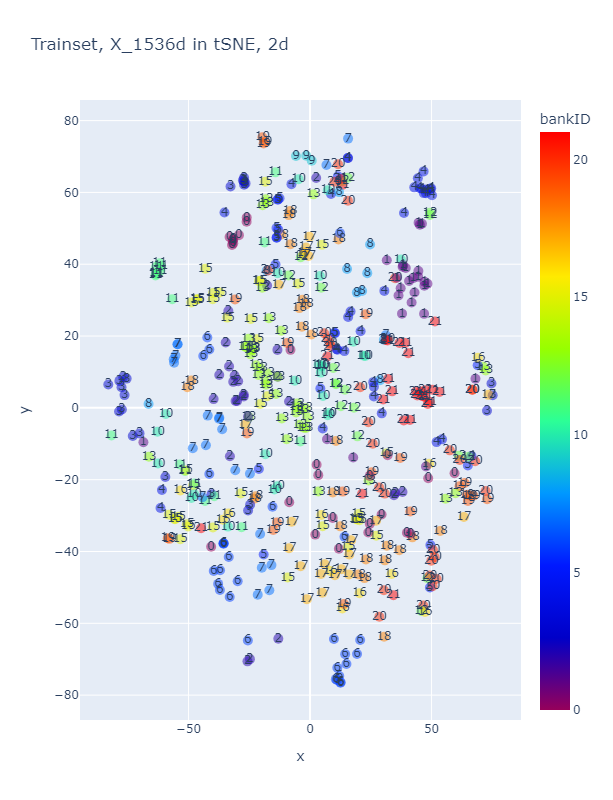

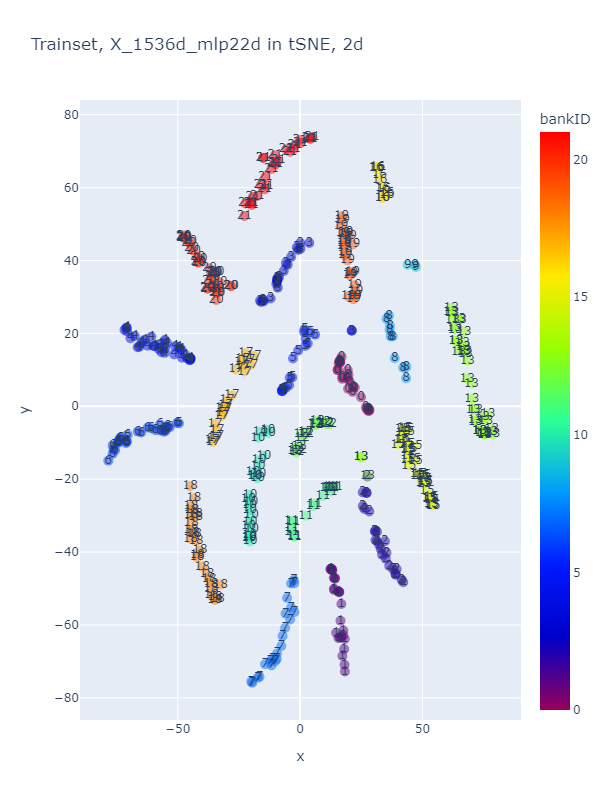

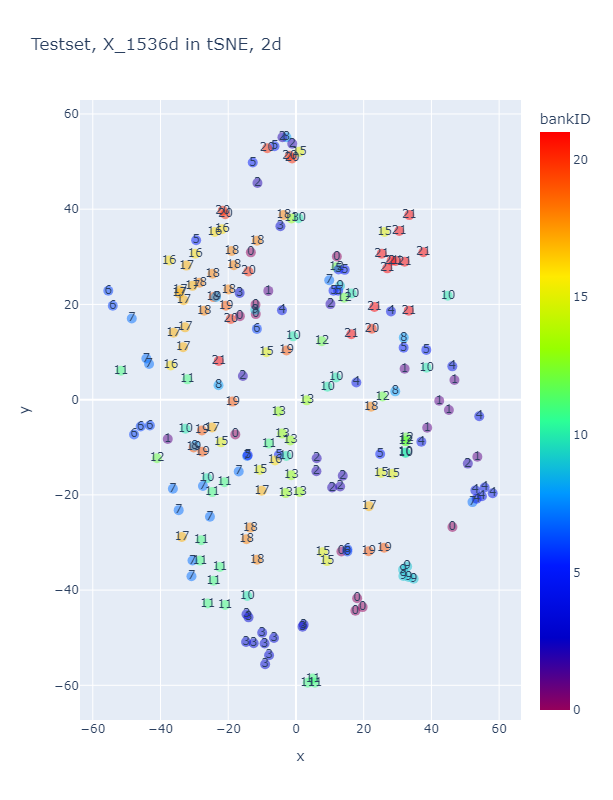

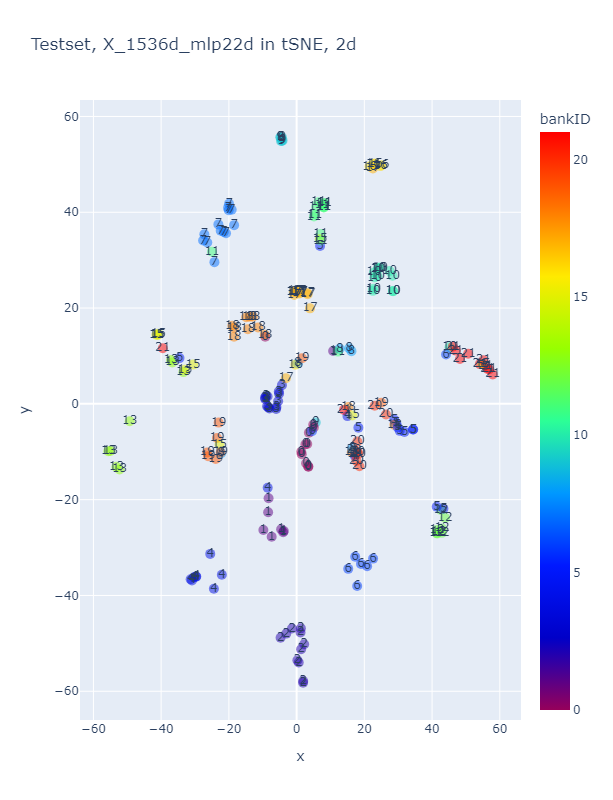

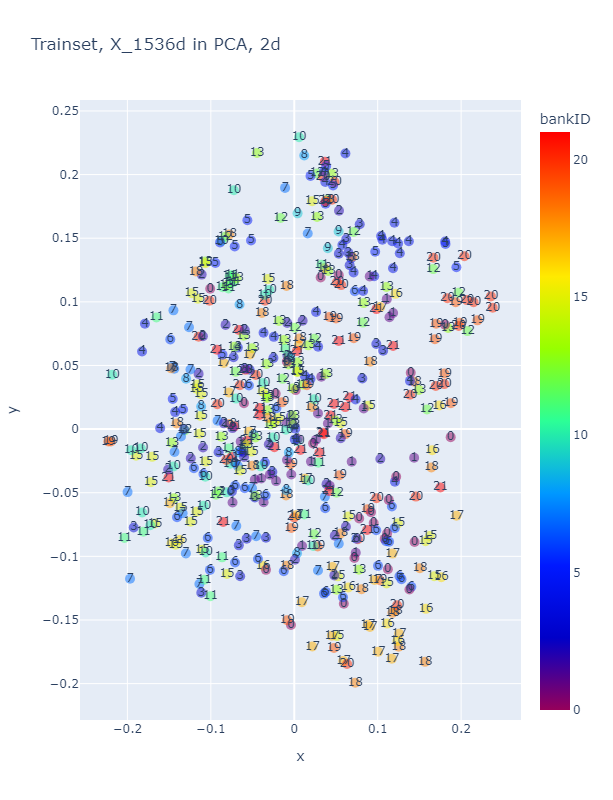

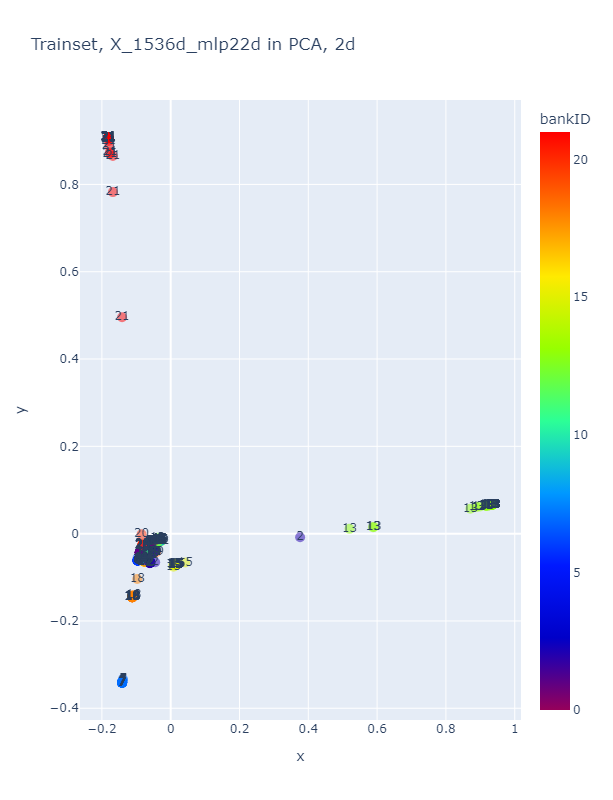

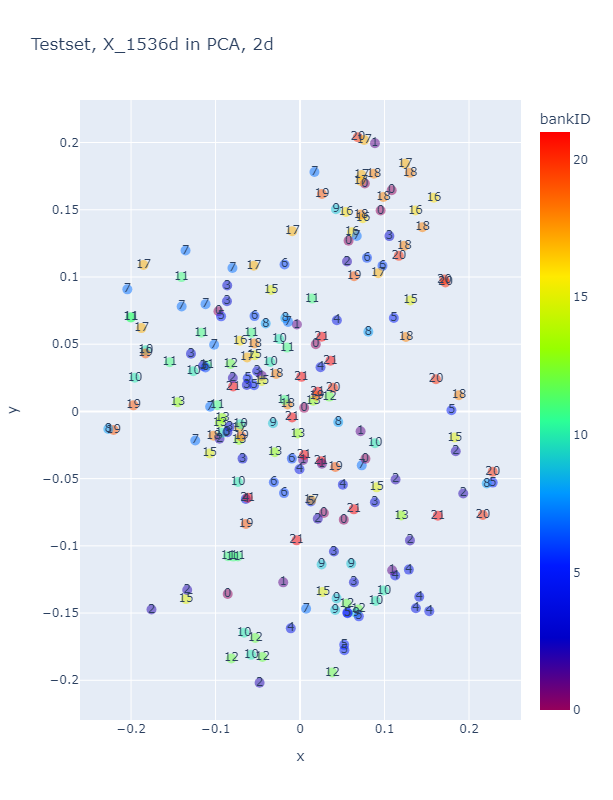

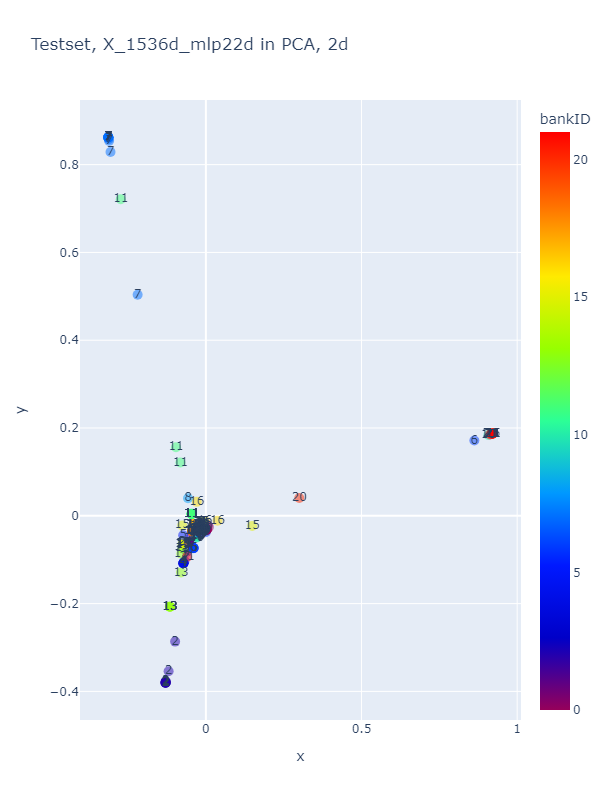

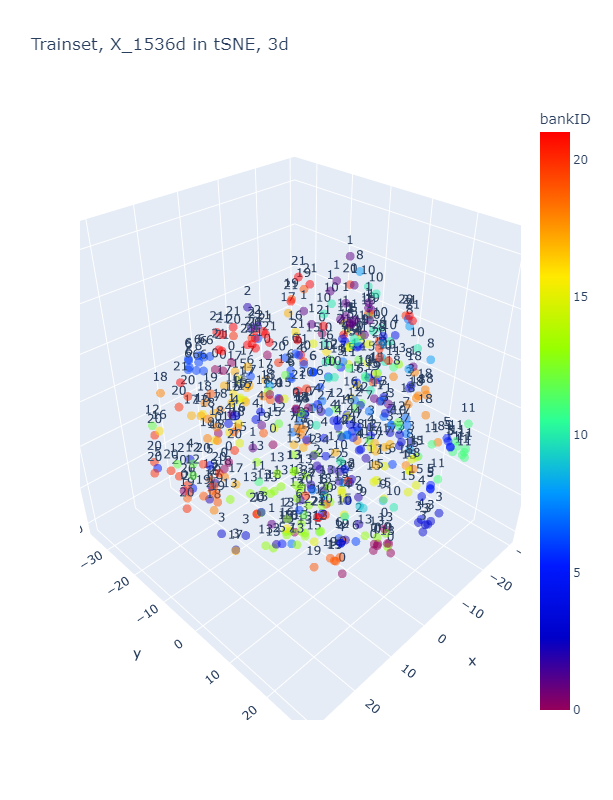

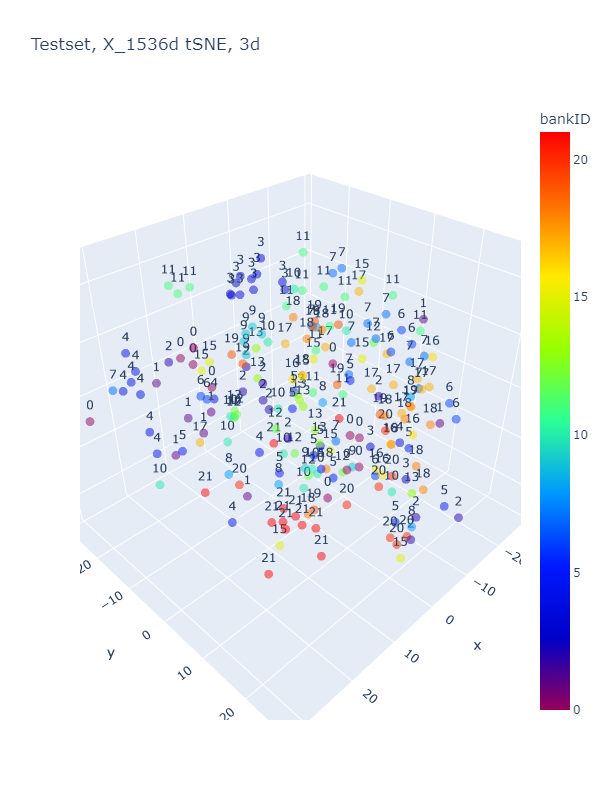

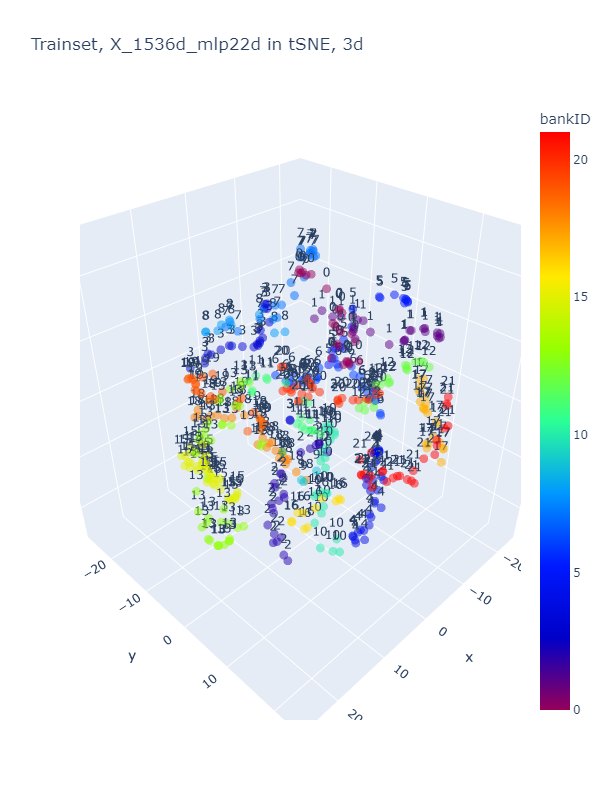

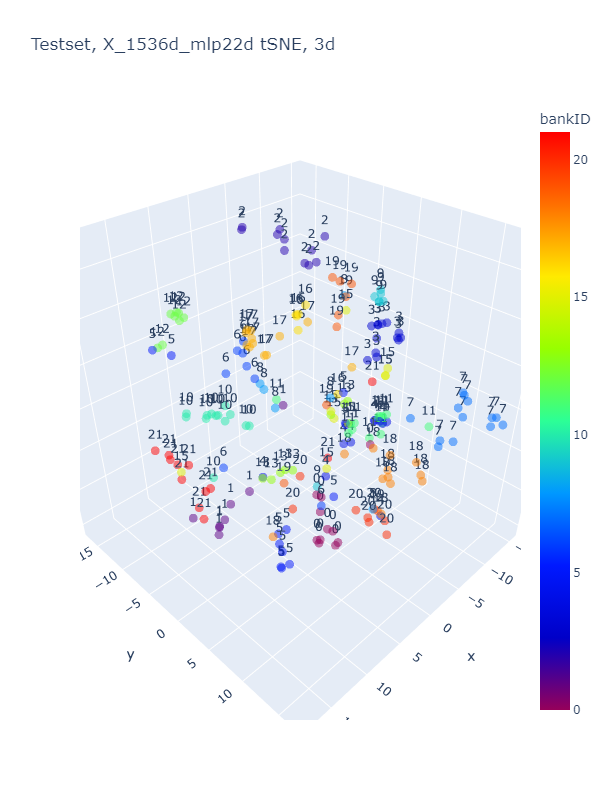

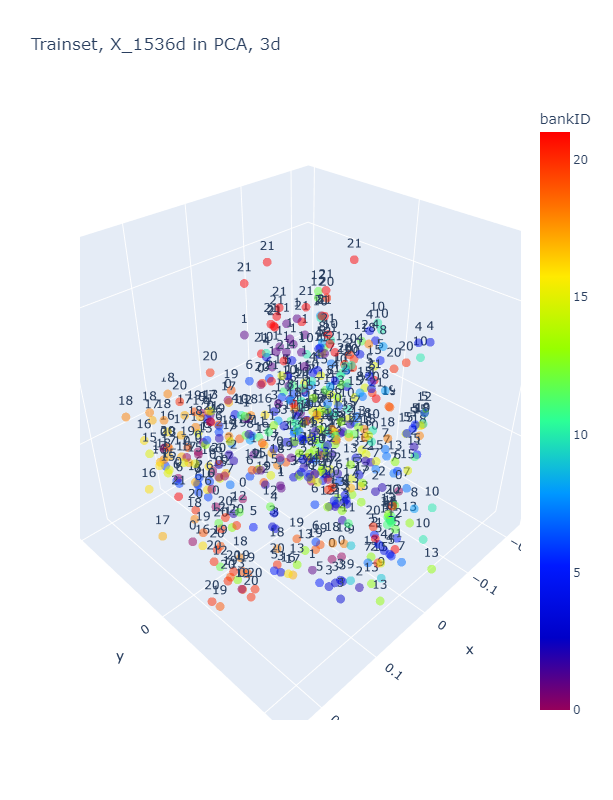

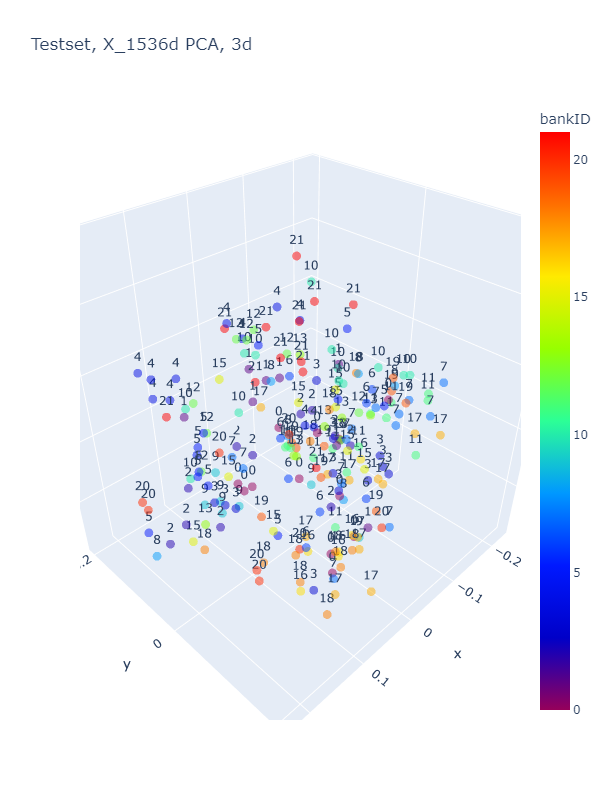

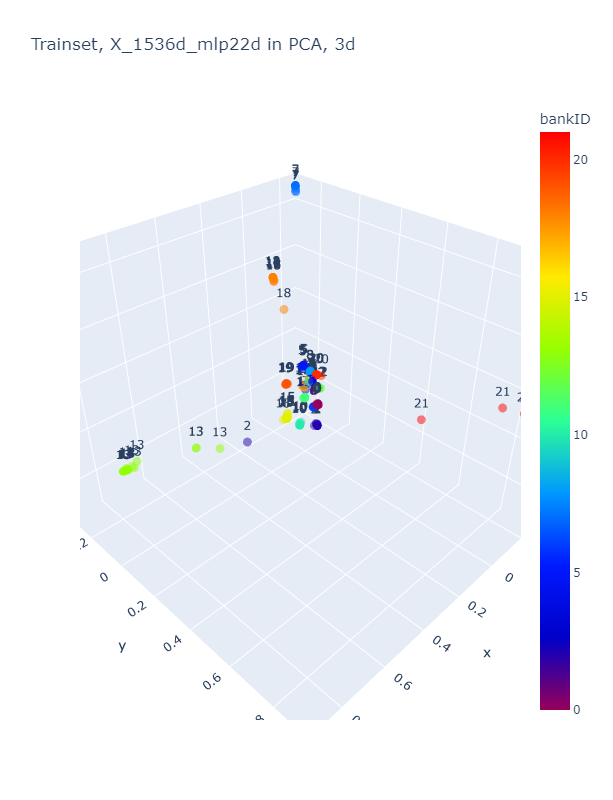

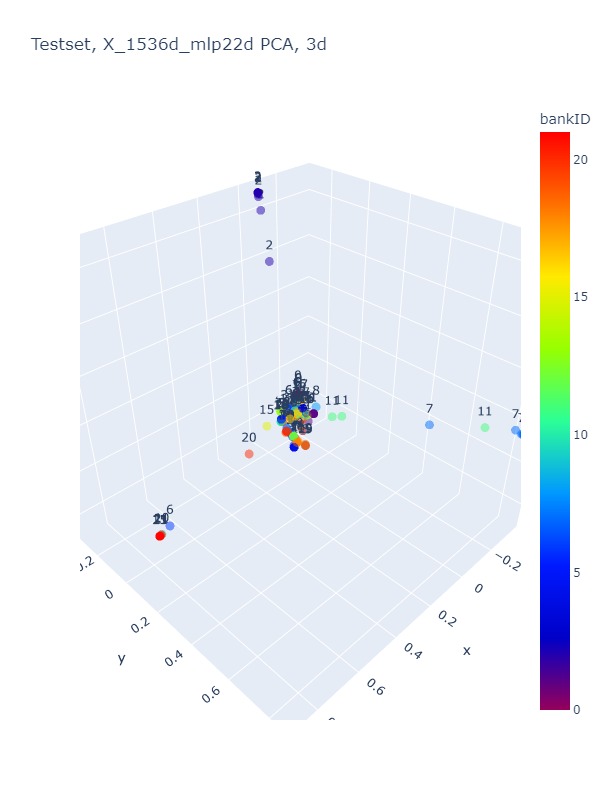

C:\Users\renyu\AppData\Local\Temp\ipykernel_31432\1021831667.py:321: RuntimeWarning:

invalid value encountered in divide



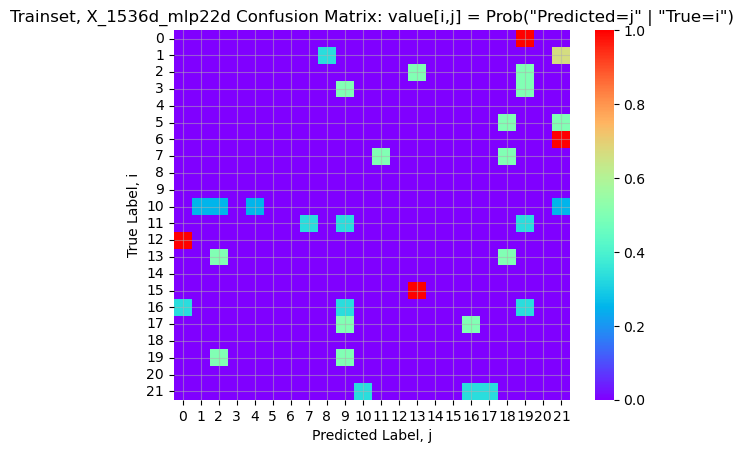

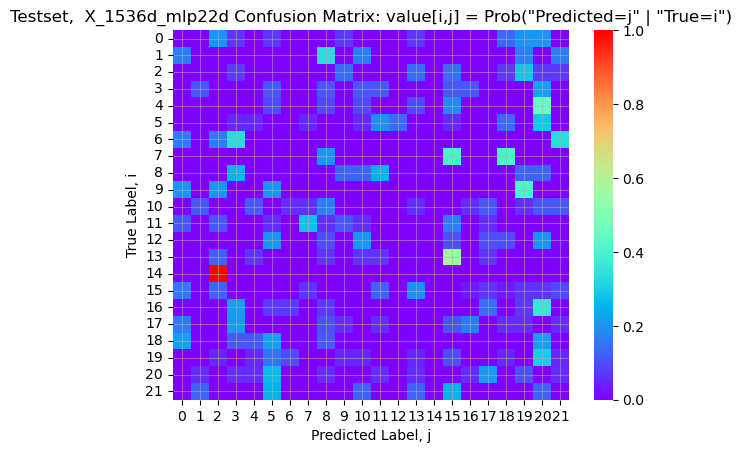

theEdgeThreshold= 0.10


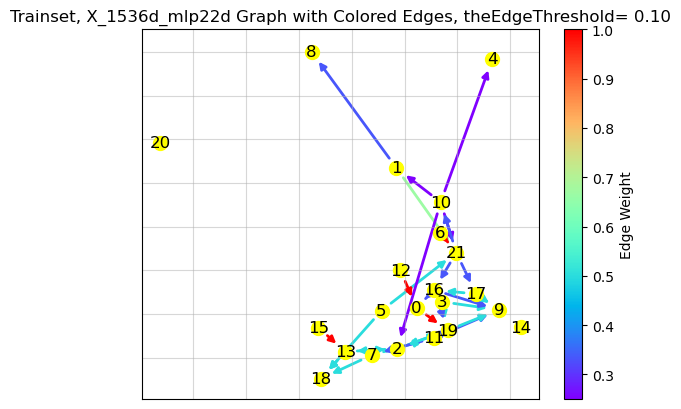

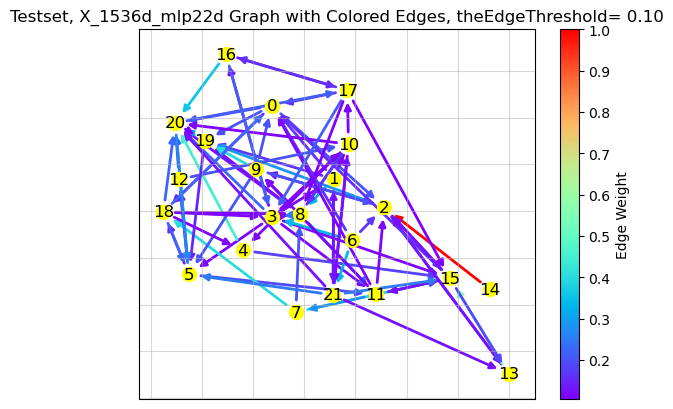

theEdgeThreshold= 0.20


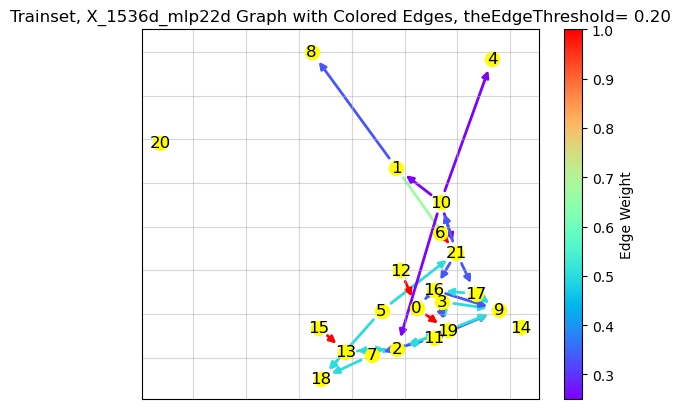

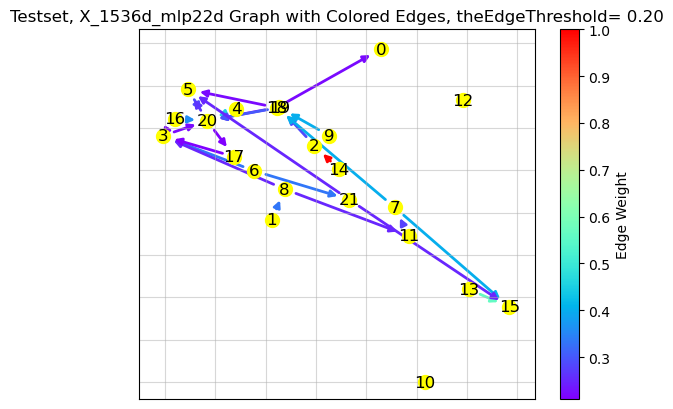

ndim= 300, X.shape= (7031, 300), y.shape= (7031,)
******************************
******************************


E:\anaconda3-2023.09\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



clf= MLPClassifier(), type(clf)= <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>
acc_train=  0.8992074781548466
acc_test=   0.7037914691943128


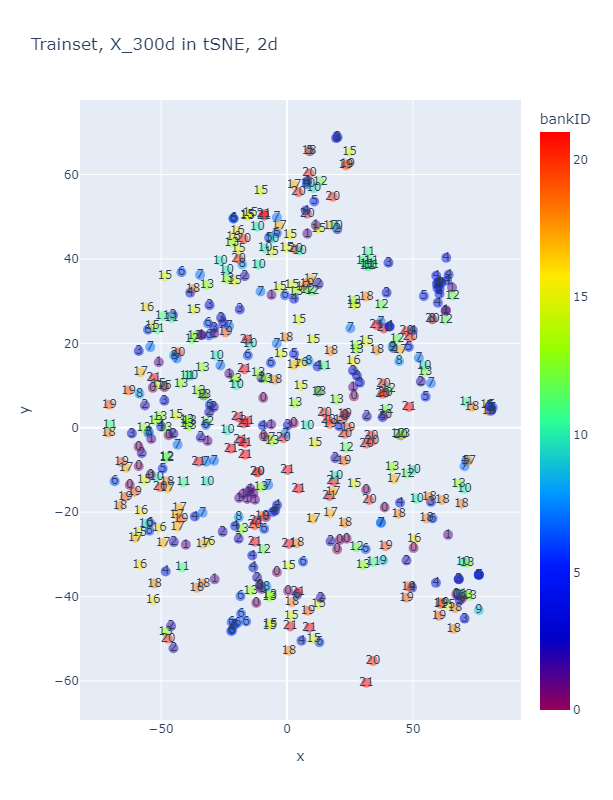

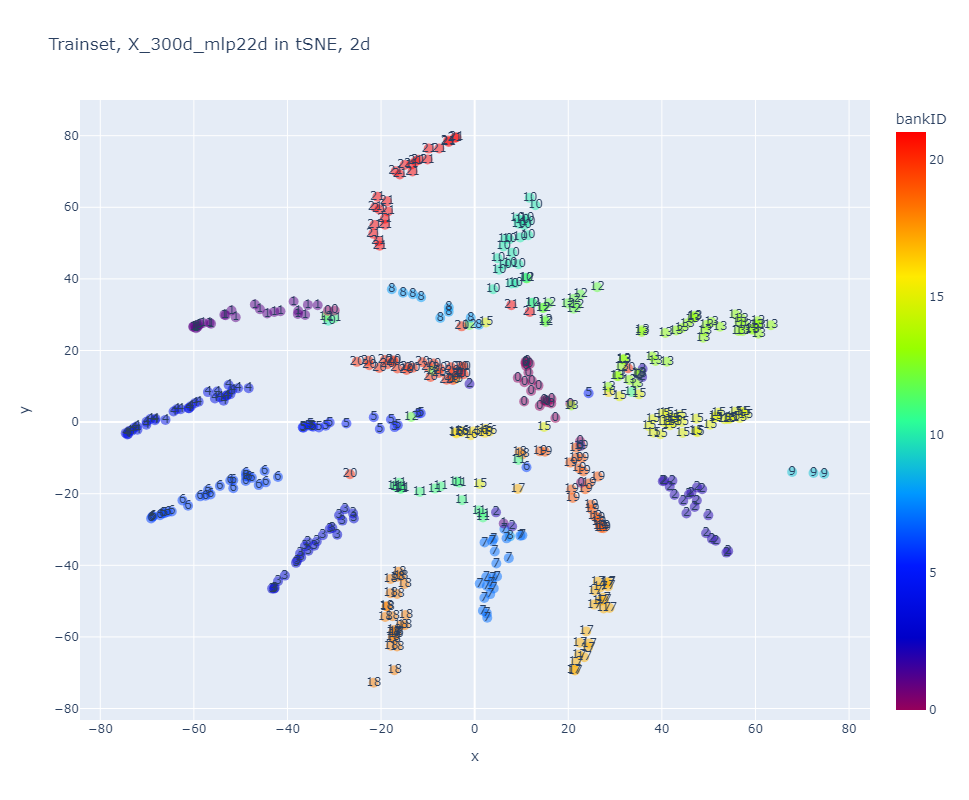

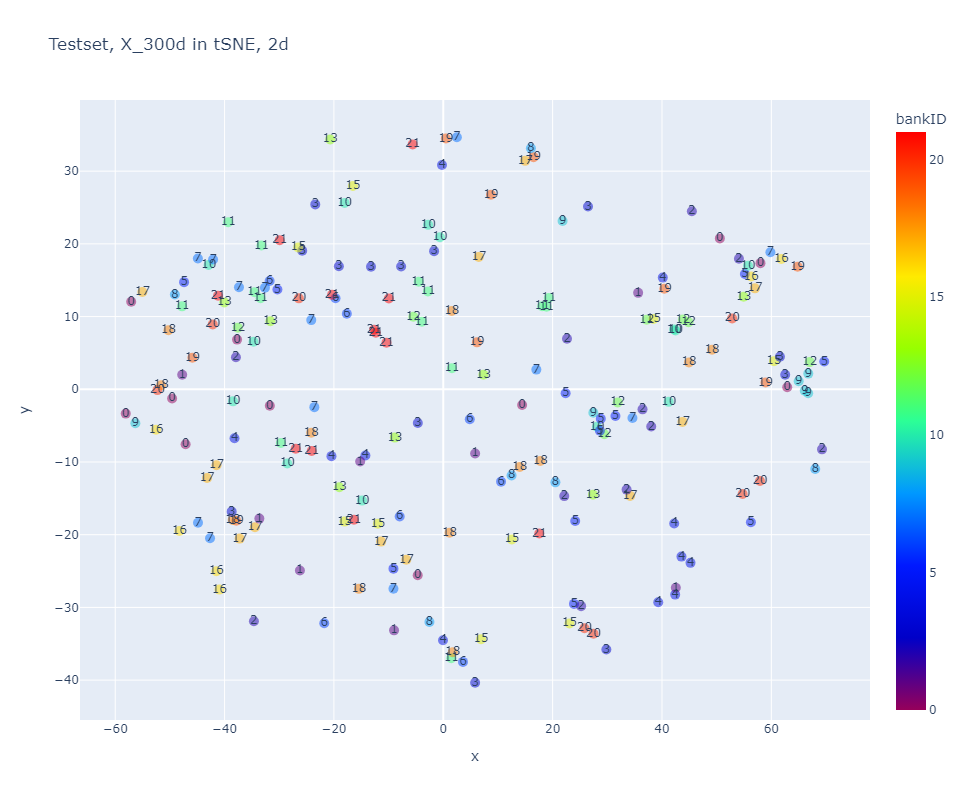

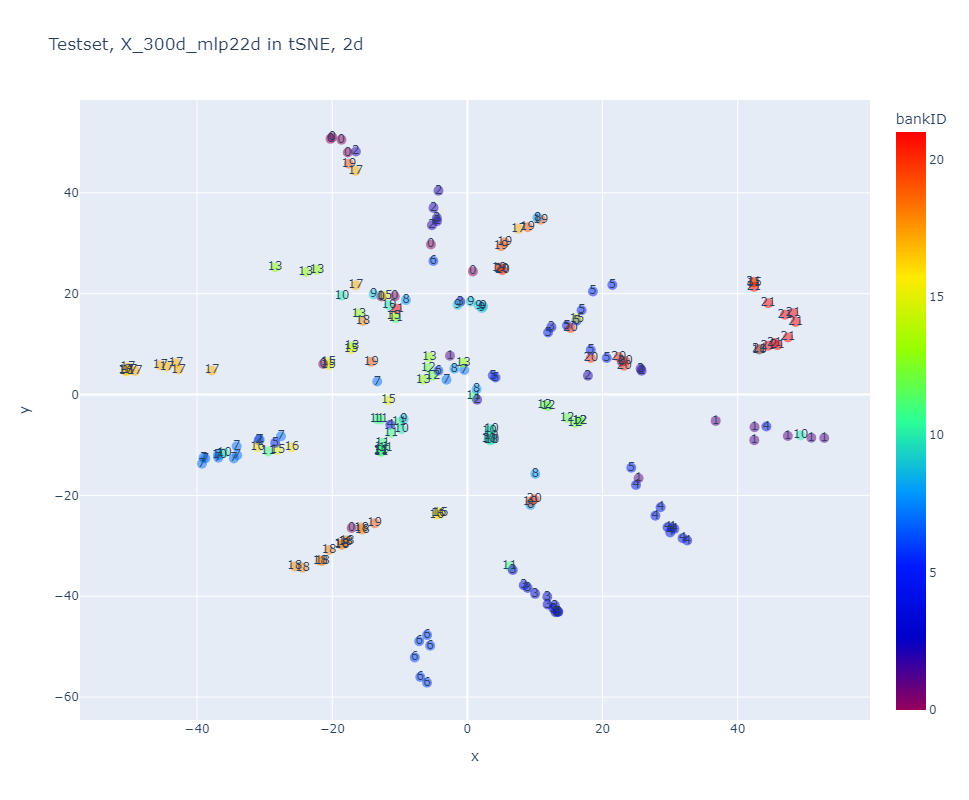

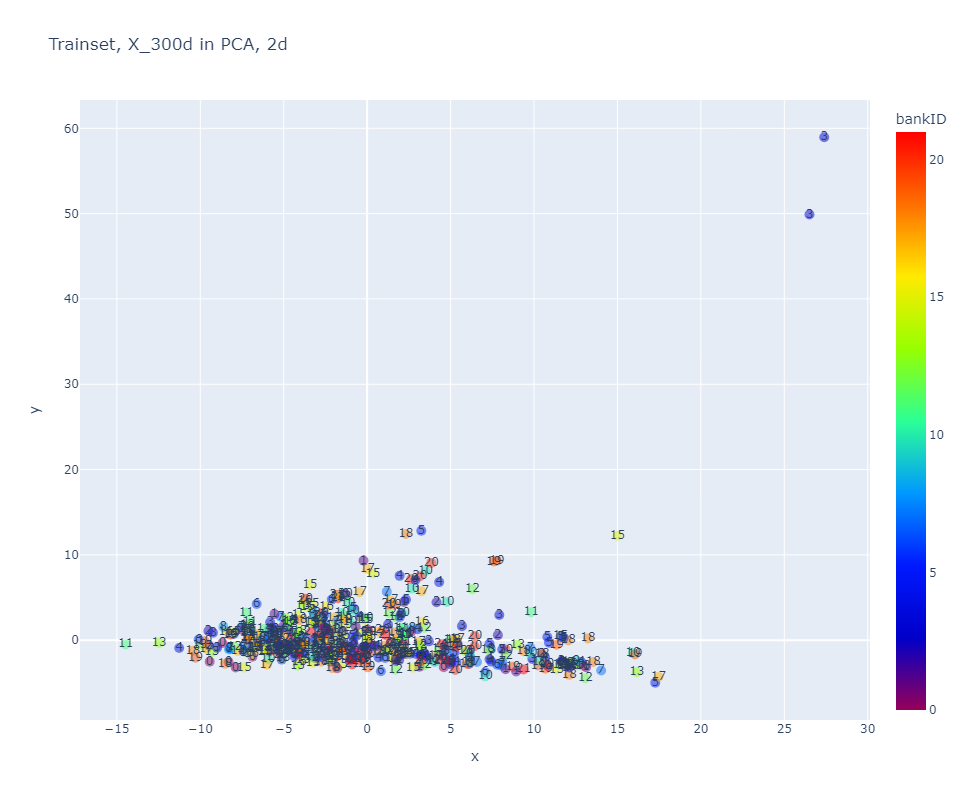

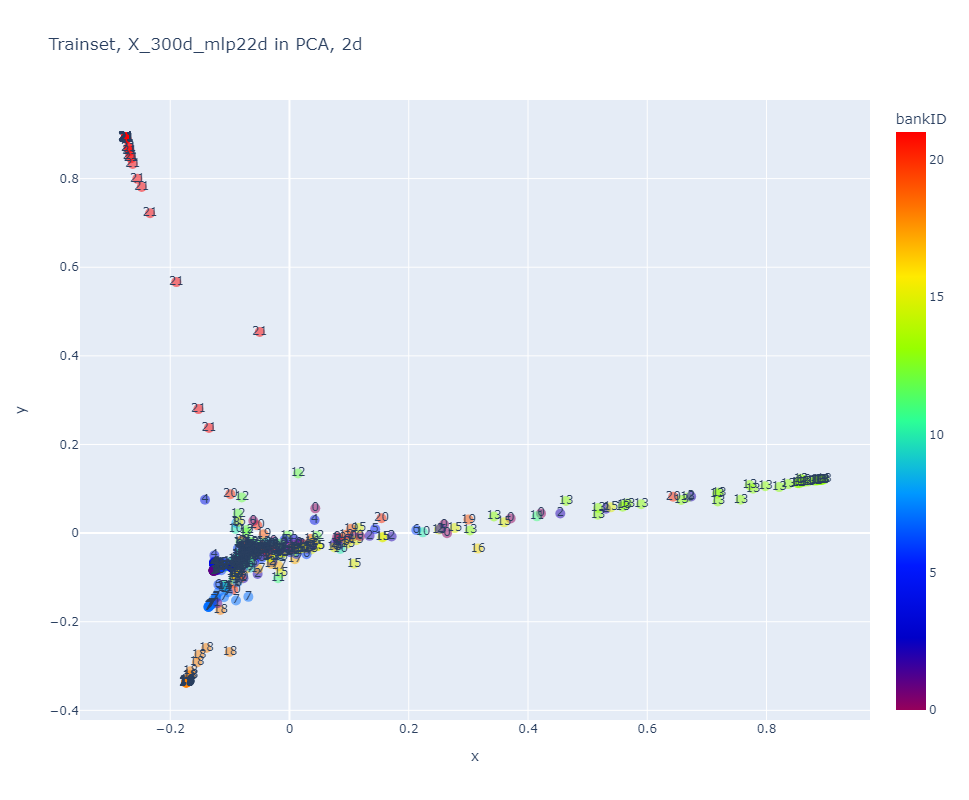

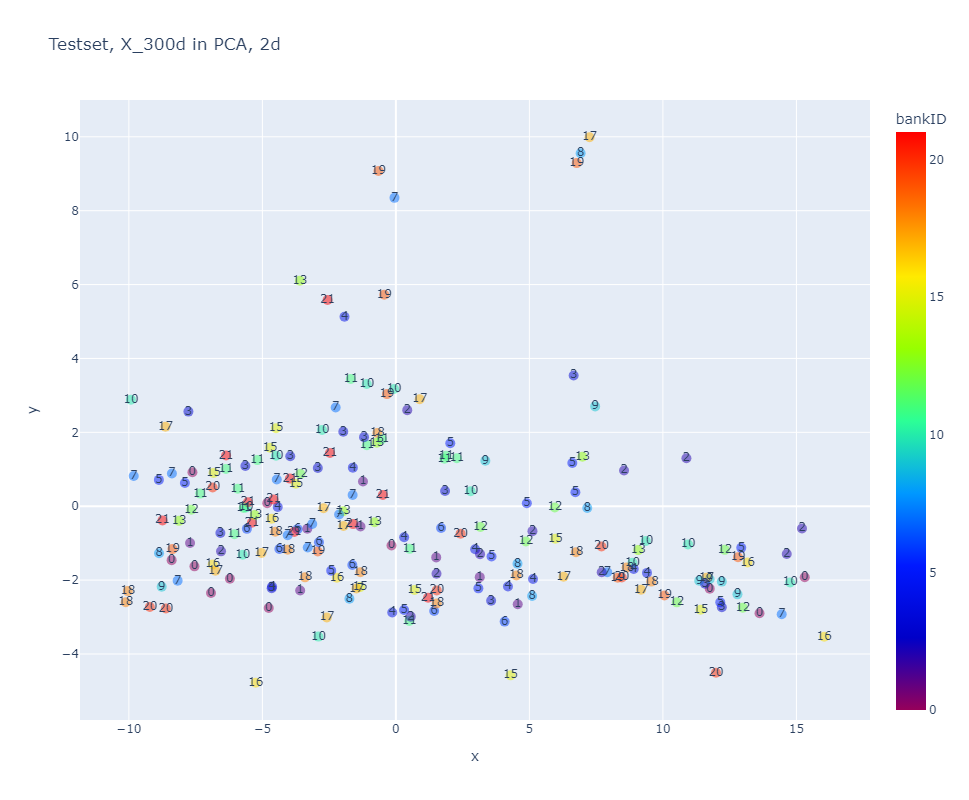

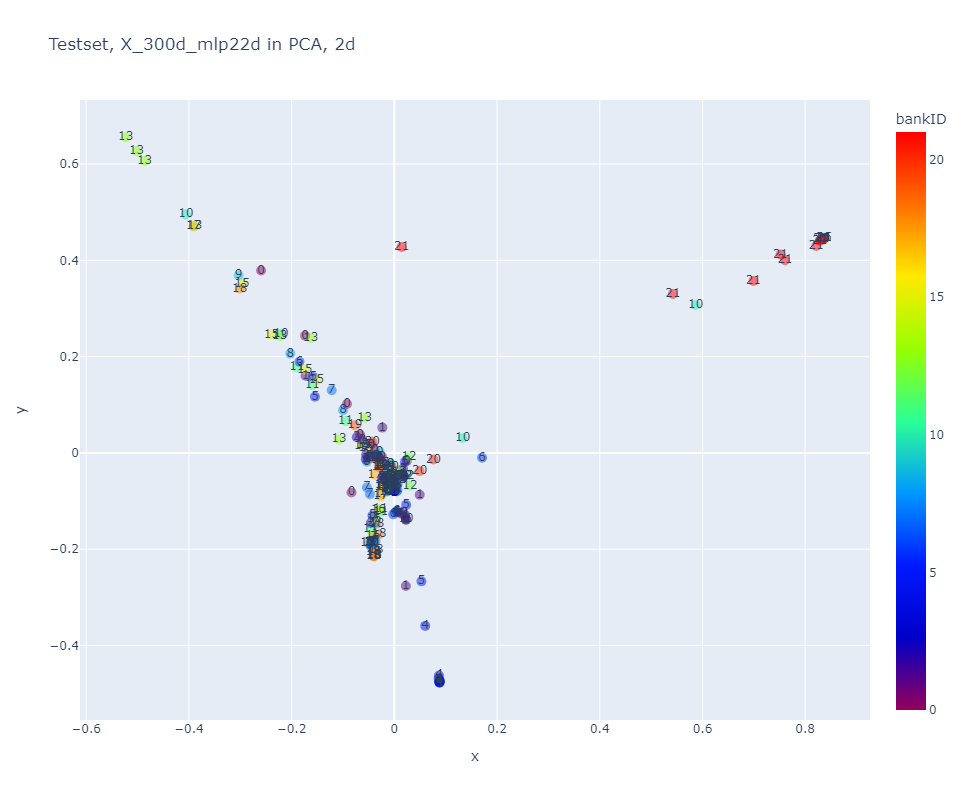

In [ ]:
if __name__ == '__main__':
    pass

for df in [df_openai, df_spacy]:

    # % get the data

    y=       df['bankID'].tolist()
    X_ndim=  df['vector'].tolist()

    y=       np.array(y)
    X_ndim=  np.array(X_ndim)

    X_ndim.shape, y.shape        
    # (7031, 300) or (7031, 1536)
    # (7031,)

    #% switch the data between  X_openai_1536 and X_pca_300, 
    # set them to be X, and run the program
    #
    X= X_ndim

    ndim= X.shape[1]

    print(f'{ndim= }, {X.shape= }, {y.shape= }')
    print('*'*30)
    print('*'*30)


    #%
    #
    # split the data into train and test
    #
    X_train, X_test, y_train, y_test= train_test_split(
        X, y, 
        test_size=0.3, 
        random_state=42)

    X_train.shape, X_test.shape, y_train.shape, y_test.shape
    #((4921, 1536), (2110, 1536), (4921,), (2110,))
    #%
    #
    # only do  the performance of MLP classifiers
    #
    '''
    for clf in [KNeighborsClassifier(), 
                SVC(), 
                LogisticRegression(), 
                RandomForestClassifier(), 
                XGBClassifier(),
                MLPClassifier()
                ]:
    '''
    clf= MLPClassifier()
    clf.fit(X_train, y_train)
    #%
    # predict on the training data
    y_pred_train= clf.predict(X_train)

    # predict on the test data
    y_pred_test= clf.predict(X_test)

    print(f'{clf= }, {type(clf)= }')
    print('acc_train= ',  accuracy_score(y_train,  y_pred_train))
    print('acc_test=  ', accuracy_score(y_test, y_pred_test))

    # %

    # use the train data to compute the confusion matrix
    cm_train= confusion_matrix(y_train, y_pred_train)
    cm_train
    #%
    # use the test data to compute the confusion matrix
    cm_test= confusion_matrix(y_test, y_pred_test)
    cm_test

    # transform the cm_train and cm_test into dataframes
    df_cm_train= pd.DataFrame(cm_train, columns=clf.classes_, index=clf.classes_)
    df_cm_test=  pd.DataFrame(cm_test,  columns=clf.classes_, index=clf.classes_)

    # put the two dataframes into one excel file
    with pd.ExcelWriter(f'df_cm_({ndim= }).xlsx') as writer:
        df_cm_train.to_excel(writer, sheet_name='cm_train')
        df_cm_test.to_excel(writer, sheet_name='cm_test')
    # %
    #%
    # look MLPClassfier upon as a embedding function
    # X_train --> X_train_22d

    mlp_22d_train= clf.predict_proba(X_train)  
    mlp_22d_test=  clf.predict_proba(X_test)

    mlp_22d_train.shape, mlp_22d_test.shape



    #% wrap the above code into a function


    #% plot X_ndim and mlp_22d in 2D

    
    ##for 降維方法 in ['tSNE', 'PCA']:

    ##    plotX_nd_in_2D(X_train, y_train,        
    ##                theTitle= f'Trainset, X_ndim in {降維方法}', 降維方法= 降維方法)
    ##    plotX_nd_in_2D(mlp_22d_train, y_train,  
    ##                theTitle= f'Trainset, mlp_22d in {降維方法}', 降維方法= 降維方法)

    ##    plotX_nd_in_2D(X_test, y_test,          
    ##                theTitle= f'Testset, X_ndim in {降維方法}', 降維方法= 降維方法)
    ##    plotX_nd_in_2D(mlp_22d_test,  y_test,   
    ##                theTitle= f'Testset, mlp_22d in {降維方法}', 降維方法= 降維方法)

    #%
    #%
    #ndim= X_train.shape[1]

    for 降維方法 in ['tSNE', 'PCA']:

        vdim= 2 # visualize dimension

        plotX_nd_in_2D_plotly(X_train, y_train,        
                            theTitle= f'Trainset, X_{ndim}d in {降維方法}, {vdim}d', 降維方法= 降維方法)
        plotX_nd_in_2D_plotly(mlp_22d_train, y_train,  
                            theTitle= f'Trainset, X_{ndim}d_mlp22d in {降維方法}, {vdim}d', 降維方法= 降維方法)

        plotX_nd_in_2D_plotly(X_test, y_test,          
                            theTitle= f'Testset, X_{ndim}d in {降維方法}, {vdim}d', 降維方法= 降維方法)
        plotX_nd_in_2D_plotly(mlp_22d_test,  y_test,   
                            theTitle= f'Testset, X_{ndim}d_mlp22d in {降維方法}, {vdim}d', 降維方法= 降維方法)
    #% plot X_ndim and mlp_22d in 3D
        

    # test the function
        
    for 降維方法 in ['tSNE', 'PCA']:

        vdim= 3 # visualize dimension

        plotX_nd_in_3D_plotly(X_train, y_train,        
                            theTitle= f'Trainset, X_{ndim}d in {降維方法}, {vdim}d', 降維方法= 降維方法)
        
        plotX_nd_in_3D_plotly(X_test, y_test,          
                            theTitle= f'Testset, X_{ndim}d {降維方法}, {vdim}d', 降維方法= 降維方法)
        
        plotX_nd_in_3D_plotly(mlp_22d_train, y_train,  
                            theTitle= f'Trainset, X_{ndim}d_mlp22d in {降維方法}, {vdim}d', 降維方法= 降維方法)

        plotX_nd_in_3D_plotly(mlp_22d_test,  y_test,   
                            theTitle= f'Testset, X_{ndim}d_mlp22d {降維方法}, {vdim}d', 降維方法= 降維方法)

    #%
    # visualize cm_test
    # normalize the confusion matrix along the row, make each row adds up to 1

    #%
    #set the values at the diagonal of cm_train, do not use np.fill_diagonal

    cm_train, cm_test
    #%
    cm_train_normalized= cm_normalized(cm_train)
    cm_test_normalized= cm_normalized(cm_test)

    cm_train_normalized, cm_test_normalized


    #%  畫 confusion matrix, Graph

    ## trainset row 14有問題...， 有nan， 設 nan= 0.0，先這樣解決

    cm_train_normalized= cm_normalized(cm_train)
    cm_test_normalized= cm_normalized(cm_test)

    plotConfusionMatrix(cm_train_normalized, clf.classes_, theTitle= f'Trainset, X_{ndim}d_mlp22d Confusion Matrix')
    plotConfusionMatrix(cm_test_normalized, clf.classes_, theTitle=  f'Testset,  X_{ndim}d_mlp22d Confusion Matrix')


    #%
    # test the function
    for theEdgeThreshold in [0.1, 0.2]:
        print(f'{theEdgeThreshold= :.2f}')

        plotConfusionMatrixAsGraph(
            cm_train_normalized, 
            clf.classes_, 
            theEdgeThreshold= theEdgeThreshold,
            theTitle= f'Trainset, X_{ndim}d_mlp22d Graph with Colored Edges',
            random_seed= 42
            )
        plotConfusionMatrixAsGraph(
            cm_test_normalized, 
            clf.classes_, 
            theEdgeThreshold= theEdgeThreshold,
            theTitle= f'Testset, X_{ndim}d_mlp22d Graph with Colored Edges',
            random_seed= 42
            )